In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(clinical_data, mouse_df, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [19]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
data_gb = combined_data.groupby(["Drug", "Timepoint"])
mean_tumor = data_gb["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_df = pd.DataFrame({"Tumor Volume": mean_tumor
                        })
# Preview DataFrame
tumor_df.head()

Tumor Volume
Drug      Timepoint              
Capomulin 0             45.000000
          5             44.266086
          10            43.084291
          15            42.064317
          20            40.716325

In [30]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = data_gb["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame({"Tumor Volume": sem_tumor
                        })
# Preview DataFrame

tumor_sem_df.head()

Tumor Volume
Drug      Timepoint              
Capomulin 0              0.000000
          5              0.448593
          10             0.702684
          15             0.838617
          20             0.909731

In [21]:
# Minor Data Munging to Re-Format the Data Frames
data_munging = tumor_df.reset_index().pivot("Timepoint", "Drug", "Tumor Volume")
# Preview that Reformatting worked
data_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


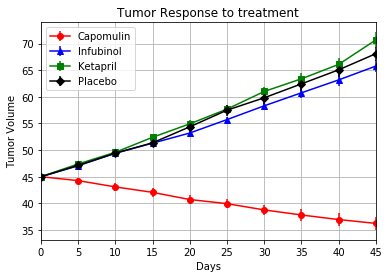

In [56]:
# Generate the Plot (with Error Bars)
sem_tumor = tumor_sem_df.reset_index().pivot(index="Timepoint", columns="Drug")["Tumor Volume"]
cap_handle = data_munging["Capomulin"].plot(kind="line", marker="o", color= "red", label="Capomulin", yerr=sem_tumor)
inf_handle =data_munging["Infubinol"].plot(kind="line", marker="^", color= "blue", label="Infubinol",  yerr=sem_tumor)
ket_handle =data_munging["Ketapril"].plot(kind="line", marker="s", color= "green", label="Ketapril",  yerr=sem_tumor)
plac_handle =data_munging[ "Placebo"].plot(kind="line", marker="D", color= "black", label="Placebo",  yerr=sem_tumor)
plt.legend(loc="upper left")
cap_handle.grid()
plt.title("Tumor Response to treatment")
plt.ylabel("Tumor Volume")
plt.xlabel("Days")
# Save the Figure
plt.savefig("tumor_res.png")


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [32]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_mt = data_gb["Metastatic Sites"].mean()
# Convert to DataFrame
mt_mn_df = pd.DataFrame({"Metastatic Sites": mean_mt
                        })
# Preview DataFrame
mt_mn_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [33]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_mt = data_gb["Metastatic Sites"].sem()
# Convert to DataFrame
mt_sem_df = pd.DataFrame({"Metastatic Sites SEM": sem_mt
                        })
# Preview DataFrame
mt_sem_df.head()

Metastatic Sites SEM
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621

In [35]:
# Minor Data Munging to Re-Format the Data Frames
pivotted_data = mt_mn_df.reset_index().pivot("Timepoint", "Drug", "Metastatic Sites")
# Preview that Reformatting worked
pivotted_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


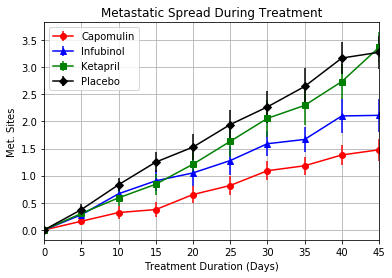

In [54]:
# Generate the Plot (with Error Bars)
sem_meta = mt_sem_df.reset_index().pivot(index="Timepoint", columns="Drug")["Metastatic Sites SEM"]
cap_handle = pivotted_data["Capomulin"].plot(kind="line", marker="o", color= "red", label="Capomulin", yerr=sem_meta)
inf_handle =pivotted_data["Infubinol"].plot(kind="line", marker="^", color= "blue", label="Infubinol",yerr=sem_meta)
ket_handle =pivotted_data["Ketapril"].plot(kind="line", marker="s", color= "green", label="Ketapril",yerr=sem_meta)
plac_handle =pivotted_data[ "Placebo"].plot(kind="line", marker="D", color= "black", label="Placebo",yerr=sem_meta)
plt.legend(loc="upper left")
cap_handle.grid()
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
# Save the Figure
plt.savefig("Met_Spread.png")




![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse = data_gb["Mouse ID"].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame({"Mouse Count": count_mouse
                        })
# Preview DataFrame
mouse_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [43]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mouse_count_df.reset_index().pivot("Timepoint", "Drug", "Mouse Count")
# Preview the Data Frame
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


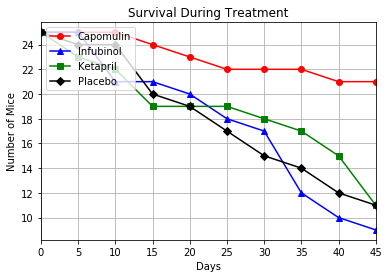

In [51]:
# Generate the Plot (Accounting for percentages)

cap_handle = mouse_pivot["Capomulin"].plot(kind="line", marker="o", color= "red", label="Capomulin")
inf_handle =mouse_pivot["Infubinol"].plot(kind="line", marker="^", color= "blue", label="Infubinol")
ket_handle =mouse_pivot["Ketapril"].plot(kind="line", marker="s", color= "green", label="Ketapril")
plac_handle =mouse_pivot[ "Placebo"].plot(kind="line", marker="D", color= "black", label="Placebo")
plt.legend(loc="upper left")
cap_handle.grid()
plt.title("Survival During Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Days")
# Save the Figure
plt.savefig("survival.png")


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [63]:
# Calculate the percent changes for each drug
perc_change = (data_munging.pct_change(len(data_munging)-1)*100).sum()
# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

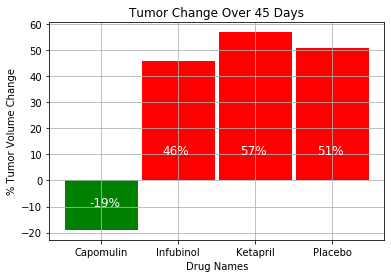

In [131]:
# Store all Relevant Percent Changes into a Tuple
drug_tuple= (int(perc_change["Capomulin"]),int(perc_change["Infubinol"]),int(perc_change["Ketapril"]),int(perc_change["Placebo"]),)

# Splice the data between passing and failing drugs
x_axis = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tuple_color= ["g" if drug < 0 else "r"  for drug in drug_tuple]
# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_axis, drug_tuple, color= tuple_color, width=.95)
plt.grid()
plt.title("Tumor Change Over 45 Days")
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drug Names")
#att = (color= tuple_color )
# Use functions to label the percentages of changes
def text(x, y, text):
    plt.text(x, y, f"{text}%", fontsize = 12, color= "white")
           
text(-.15, -10, drug_tuple[0])
text(.8, 10, drug_tuple[1])
text(1.8, 10, drug_tuple[2])
text(2.8, 10, drug_tuple[3])


# Call functions to implement the function calls


# Save the Figure
plt.savefig("summary.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)